In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
from tensorflow.keras.datasets import cifar10

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 283s 2us/step


In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
X_train = X_train/255
X_test = X_test/255

## Build CNN model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32, 32,3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.4048 - sparse_categorical_accuracy: 0.4931 - val_loss: 1.1317 - val_sparse_categorical_accuracy: 0.5933
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0787 - sparse_categorical_accuracy: 0.6186 - val_loss: 1.0350 - val_sparse_categorical_accuracy: 0.6333
Epoch 3/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.9490 - sparse_categorical_accuracy: 0.6644 - val_loss: 0.9304 - val_sparse_categorical_accuracy: 0.6668
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.8555 - sparse_categorical_accuracy: 0.6981 - val_loss: 0.9163 - val_sparse_categorical_accuracy: 0.6757
Epoch 5/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.7931 - sparse_categorical_accuracy: 0.7183 - val_loss: 0.8903 - val_sparse_categorical_accuracy: 0.6920
Epoch 6/10
5000

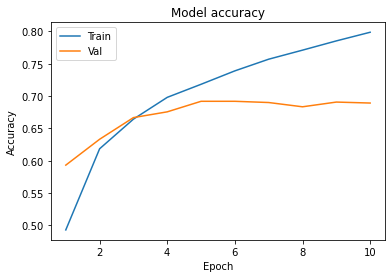

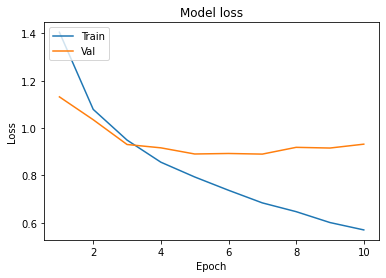

In [27]:
#plot training & validation accuracy
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training & loss accuracy
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [28]:
y_pred = model.predict_classes(X_test)

In [29]:
mat = confusion_matrix(y_test, y_pred)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2bc6b6ede88>)

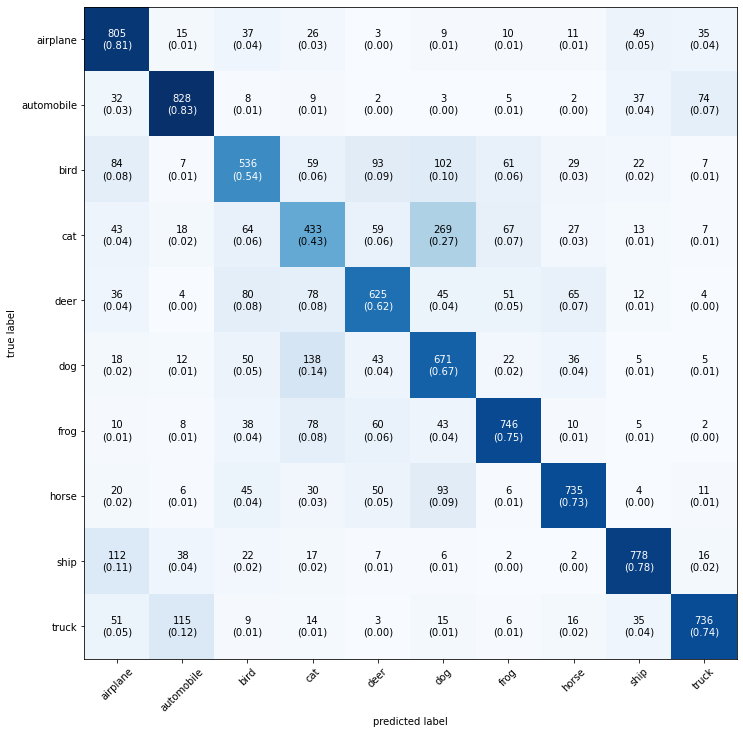

In [31]:
plot_confusion_matrix(mat, figsize=(12, 12), class_names=class_names, show_normed=True)